# Parcial Computacional
* Métodos Estadísticos en Física Experimental
* Julio 2023
* Alumna: Trinidad Borrell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import seaborn as sns
from scipy.stats import chi2
from math import factorial
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format='retina'
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['figure.dpi'] = 120
rcParams['legend.fontsize'] = 8
rcParams['axes.labelsize'] = 'large'
rcParams['axes.xmargin'] = 0
rcParams['axes.grid'] = False
rcParams['xtick.labelsize'] = 7
rcParams['ytick.labelsize'] = 7

titulos = ['P(m|M)', 'P(h|H)']

### Funciones útiles

In [2]:
def hipergeo(K, N, k, n):
    a = factorial(K)/(factorial(K-k)*factorial(k))
    b = factorial(N-K)/(factorial(N-K-n+k)*factorial(n-k))
    c = factorial(N)/(factorial(N-n)*factorial(n))
    return (a*b)/c

In [40]:
def histogramas(datos_exp, dist, y, p_c = False, p_c_data = [], alpha_data = [], p_m = False, p_m_data = [], x_label = 'no x label'):
    
    print(f'\nDist {titulos[dist]}\n\n')

    bins = []
    w = []
    Y = []
    y_norm = []
    errs = []
    xlim = []
    pvals = []

    for j in np.arange(len(datos_exp)):

        # Genero bins con anchos
        bins_=np.linspace(np.min(datos_exp[j][:]),np.max(datos_exp[j][:]), len(np.unique(datos_exp[j][:])))
        w_ = (np.max(datos_exp[j][:]) - np.min(datos_exp[j][:]))/(len(np.unique(datos_exp[j][:]))) # Ancho de los bins
        Y_ = np.histogram(datos_exp[j][:], bins=bins_)[0] # Histograma sin normalizar
        y_norm_ = Y_ / (np.sum(Y_) ) # Histograma normalizado
        #Planteo errores
        errs_ = (np.sqrt(Y_))*(1/(np.sum(Y_)))
        #Calculo límites
        xlim_ = [np.min(datos_exp[j][:]),1]

        bins.append(bins_)
        w.append(w_)
        Y.append(Y_)
        y_norm.append(y_norm_)
        errs.append(errs_)
        xlim.append(xlim_)

        if p_m == True:
            idx = []
            #Calculo el p-valor
            for n in range(0, len(bins_)-1):
                if np.round(bins_[n], 3) == np.round(p_m_data[j], 3): 
                    print(f'{ p_m_data[j]}, bins: (n) {bins_[n]}')
                    idx =range(n, len(bins_) -1)
            pvals.append(y_norm_[idx].sum())

    #Planteo el plot
    fig, axs = plt.subplots(2, 2, dpi = 250)
    for j, ax in zip(np.arange(len(datos_exp)), axs.flat):

        if xlim[j][0] > 0.5:
            xlim[j][0] = 0.55
            xlim[j][1] = 0.96
        else:
            xlim[j][0] = 0
    
        ax.bar(bins[j][:-1], y_norm[j], width=w[j], align='edge', ec='k')
        #Grafico Errores
        if (p_c == False) and (p_m == False):
            #con label
            ax.errorbar(bins[j][:-1] + 0.5*w[j], y_norm[j], yerr = (errs[j]), fmt='.', color= 'black', label = 'Errores')
        else:
            #sin label
            ax.errorbar(bins[j][:-1] + 0.5*w[j], y_norm[j], yerr = (errs[j]), fmt='.', color= 'black')

        #Garfico p_c
        if p_c == True:
            n = int(np.argwhere(bins[j][:-1] >= p_c_data[j])[0])
            ax.axvline(p_c_data[j], ls= '--', lw = 1, color = 'black', label = f'$p_c: {np.round(p_c_data[j], 4)}$')
            ax.bar(bins[j][n:-1], y_norm[j][n:], width=w[j], align='edge', ec='k', label = f'$alpha: {np.round(alpha_data[j], 4)}$')
        if p_m == True:
            ax.axvline(p_m_data[j], ls= '-.', lw = 1, color = 'red', label = f'$p-medida: {p_m_data[j]}$')
        ax.set_title(f'Año: {y[j]}', fontsize = 7)
        ax.set_ylabel("$P$", fontsize = 7)
        ax.set_xlabel(x_label, fontsize = 7)
        ax.set_xlim(xlim[j][0], xlim[j][1])
        ax.set_ylim(0, 0.6)
        ax.legend(fontsize = 6)
    fig.tight_layout(pad=1.2)
    plt.show()

    if p_m == True:
        pvals[1] = 1/10000
        print(f'\np-values: {pvals}\n\n')

    return pvals

In [4]:
def histograma(datos_exp,xlim, p_c = False, p_c_data = [], p_m = False, p_m_data = [], x_label = 'no x label', title = 'no title'):

    p_val = 0

    # Genero bins con anchos
    bins=np.linspace(np.min(datos_exp),np.max(datos_exp), len(np.unique(datos_exp)))
    w = (np.max(datos_exp) - np.min(datos_exp))/len(np.unique(datos_exp)) # Ancho de los bins
    
    Y = np.histogram(datos_exp, bins=bins)[0] # Histograma sin normalizar
    y_norm = Y / (np.sum(Y) ) # Histograma normalizado

    #Planteo errores
    errs = (np.sqrt(Y))*(1/(np.sum(Y)))

    if p_m == True:
        idx = []
        #Calculo el p-valor
        for n in range(1, len(bins)-1):
            if bins[n-1] < p_m_data < bins[n]: 
                idx = range(n-1, len(bins) - 1)
        p_val = y_norm[idx].sum()
        print(f'p-value: {p_val}')

    #Planteo el plot

    if xlim[1] > 0.8:
        xlim[1] = 0.96

    fig, ax = plt.subplots(1, 1, dpi=150)
    ax.bar(bins[:-1], y_norm, width=w, align='edge', ec='k')
    #Grafico Errores
    plt.errorbar(bins[:-1] + 0.5*w, y_norm, yerr = (errs), fmt='.', color= 'black')
    if p_c == True:
        ax.axvline(p_c_data, ls= '--', color = 'black', label = f'$p_c: {np.round(p_c_data, 3)}$')
    if p_m == True:
        ax.axvline(p_m_data, ls= '-.', color = 'red', label = f'$p-medida: {p_m_data}$')
    ax.set_xlim(xlim[0],xlim[1])
    ax.set_xmargin(0)
    ax.set_xlabel(x_label)
    ax.set_ylabel("$P$")
    ax.set_title(title)
    ax.legend()
    plt.show()

    return p_val

# 1er TEST
#### H0 = no existe afinidad de género

## 1) 
A partir de los datos consignados en la Tabla $1$, realice una simulacion que le permita asignar $N=10000$ veces cada candidate con un directore (sin reposicion), calcule para cada una de las $N$ asignaciones las probabilidades condicionales $p(M|m)$ y $p(H|h)$ y a partir de ellas grafique sus distribuciones.

In [30]:
#Posiciones i-esimas [2019, 2020, 2021, 2022]
y = np.array([2019, 2020, 2021, 2022])

m = np.array([21,11,11,15])
h = np.array([49, 41, 50, 58])

M = np.array([16, 8, 9, 13])
H = np.array([54, 44, 52, 60])

p_cond_mM = np.array([0.3809, 0.5455, 0.2727, 0.2667])
p_cond_hH = np.array([0.8367, 0.9512, 0.8800, 0.8448])

### Simulaciones

In [6]:
def simul_h_3(y, m, h, M, H):

    h = np.array(h)
    m = np.array(m)
    H = np.array(H)
    M = np.array(M)

    m_M_y = []
    h_H_y = []

    for i in range(len(y)):
    #0: m
    #1: h
        d = (np.concatenate([[0]*M[i], [1]*H[i]])) #Lista de directorxs
        c = (np.concatenate([[0]*m[i], [1]*h[i]])) #Lista de candidatxs

        np.random.shuffle(d)
        rand.shuffle(c)

    #Clasifico éxitos: si en ambos índices hay 0's (mujeres) o 1's varones, sumamos unéxito
        #Mujeres con mujeres
        #Hombres con hombres
        k_mM = 0
        k_hH = 0
        for j in range(len(d)):
            if d[j] == 0 and c[j] == 0:
                k_mM = k_mM + 1
            elif d[j] == 1 and c[j] == 1:
                k_hH = k_hH + 1

        m_M_y.append(k_mM)
        h_H_y.append(k_hH)

    m_M_y = np.array(m_M_y)
    h_H_y = np.array(h_H_y)

    #Considero las intersecciones (k: exitos) y las divido por el total y a eso lo divido por la P(M) o p(H) (asi hago: P(intersección) / P(M o H))
    p_m_M = m_M_y / m
    p_h_H = h_H_y / h

    return p_m_M, p_h_H

In [7]:
#Simulación con N = 100000

N = 10000

#Número candidatxs {m, h} con directorxs {M, H}

m_M = np.zeros((4, N)) #mujeres c, mujeres d
h_H = np.zeros((4, N)) #hombres c, hombres d
h_M = np.zeros((4, N)) #mujeres c, mujeres d
m_H = np.zeros((4, N)) #hombres c, hombres d

for i in range(N):
    m_M_i, h_H_i = simul_h_3(y, m, h, M, H)
    for j in range(4):
        m_M[j][i] = m_M_i[j]
        h_H[j][i] = h_H_i[j]

resultados = [m_M, h_H]


Dist P(m|M)




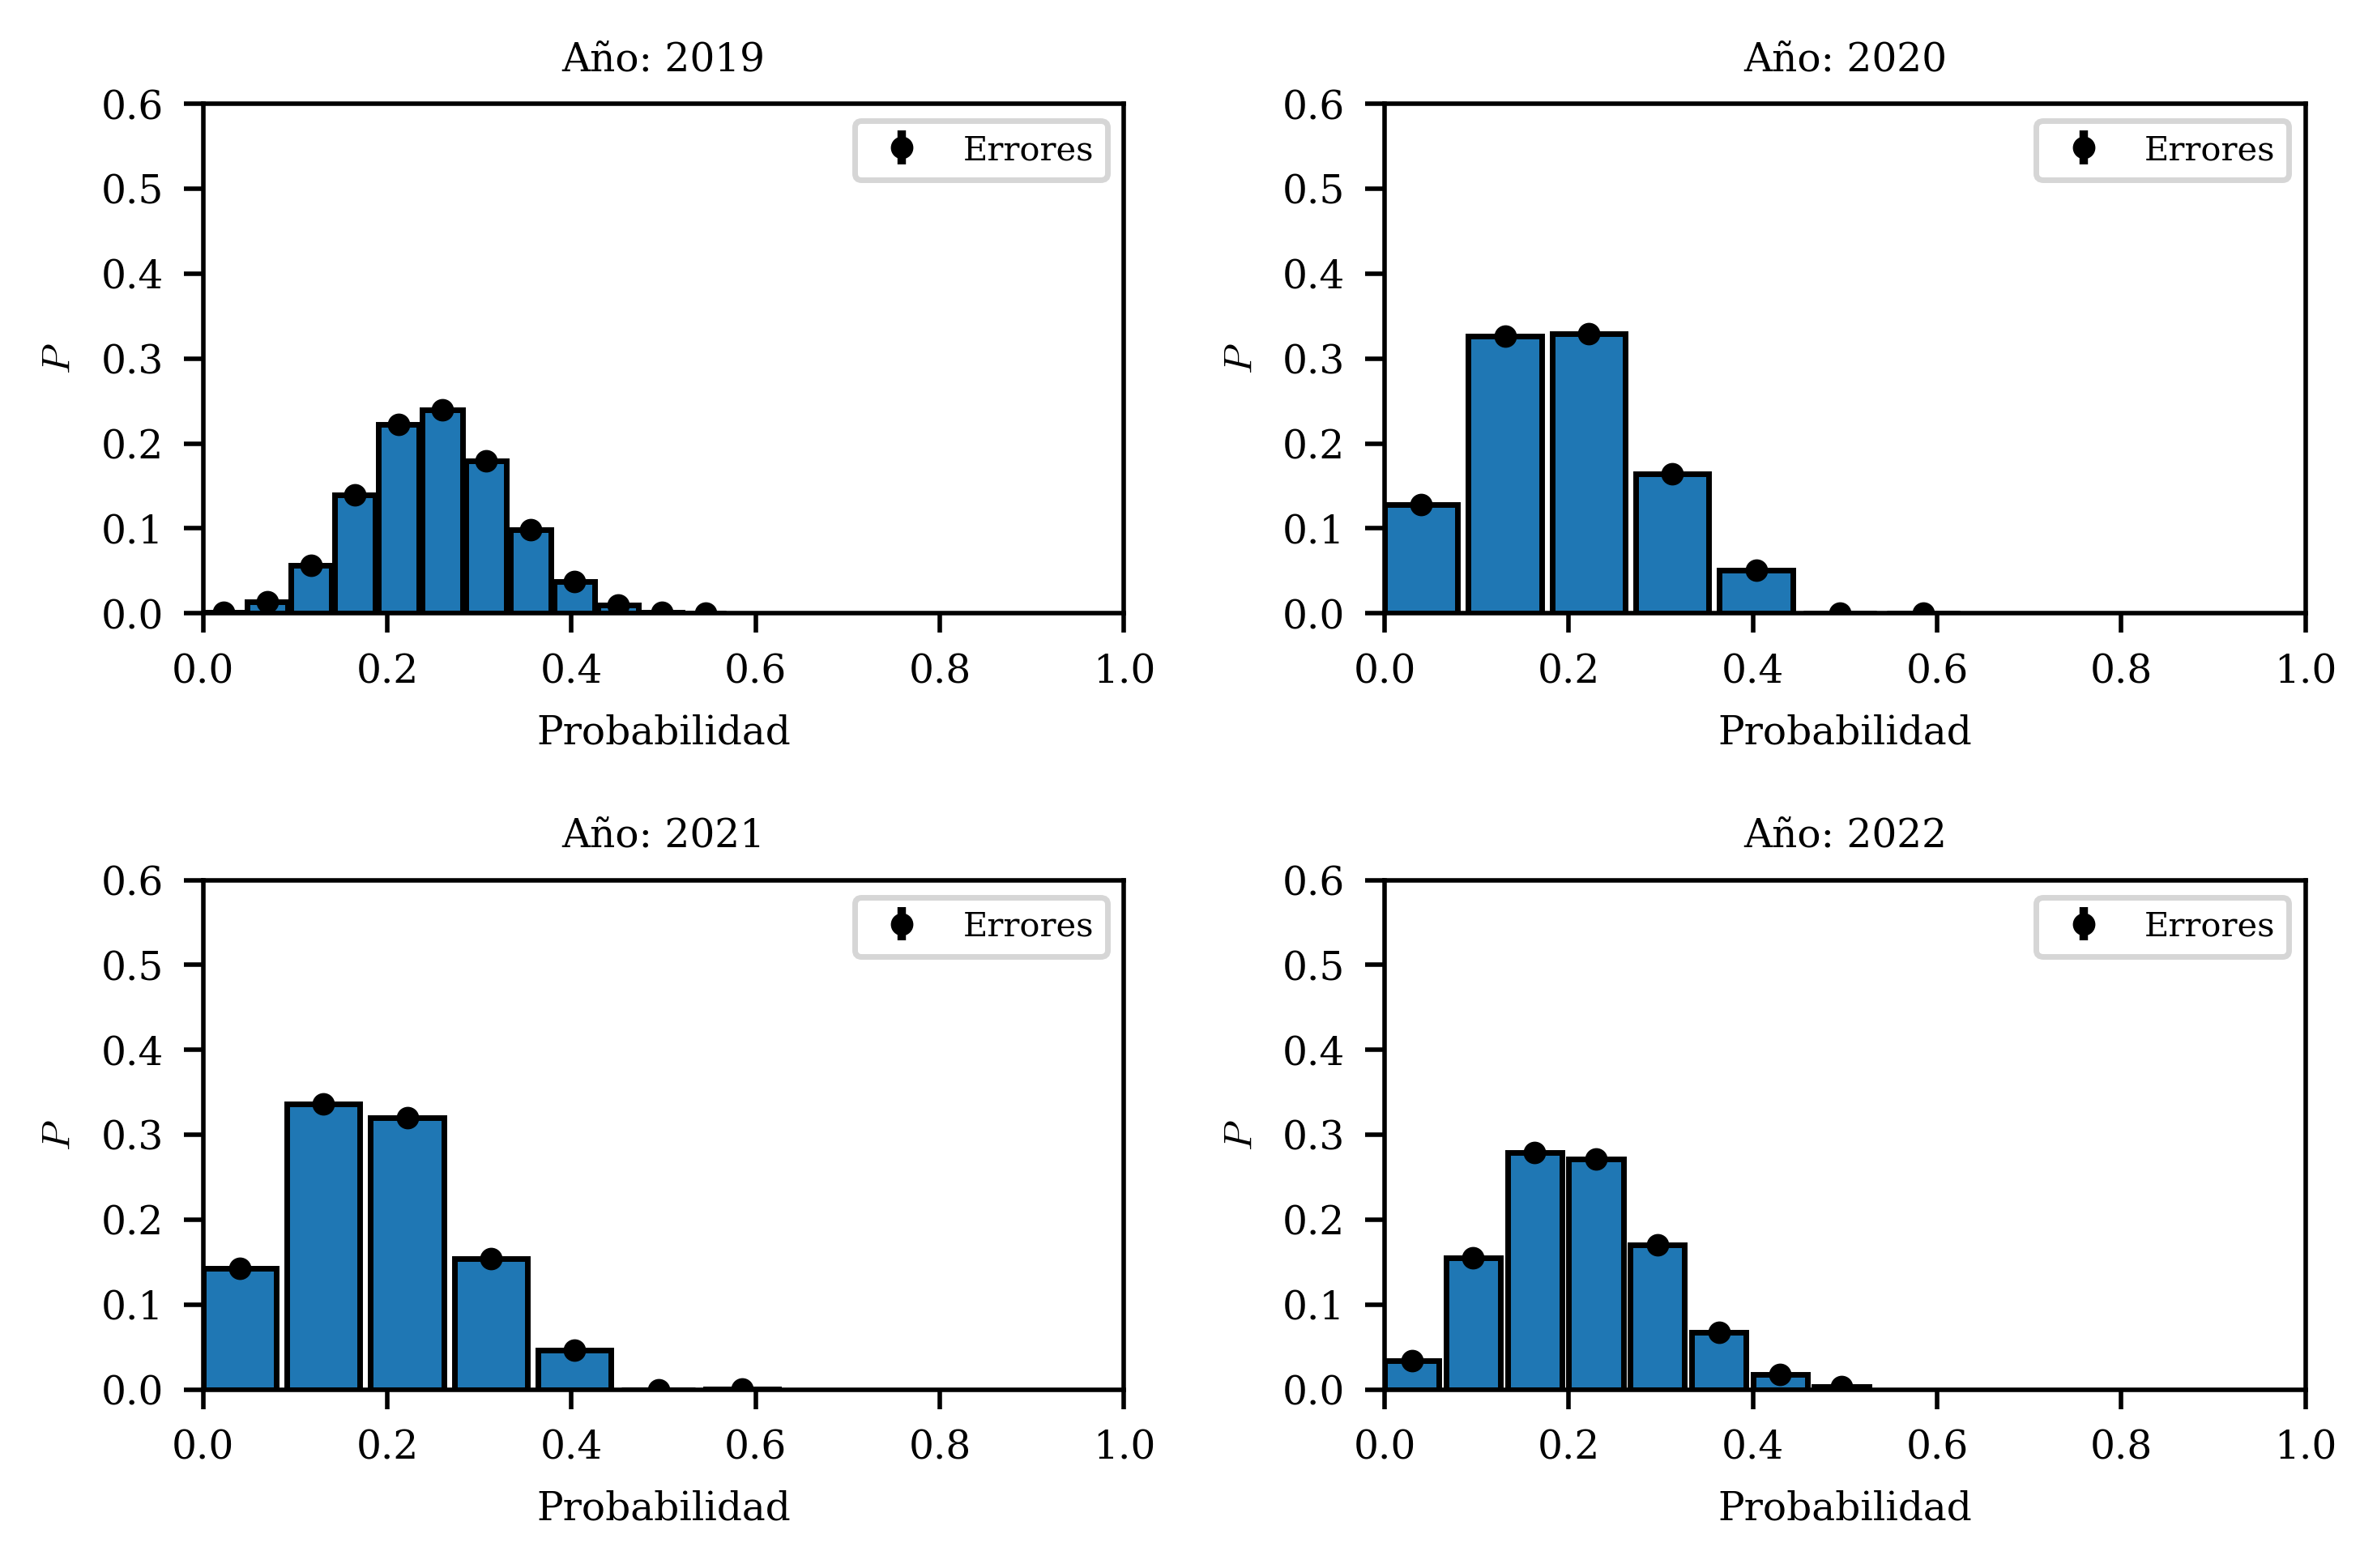


Dist P(h|H)




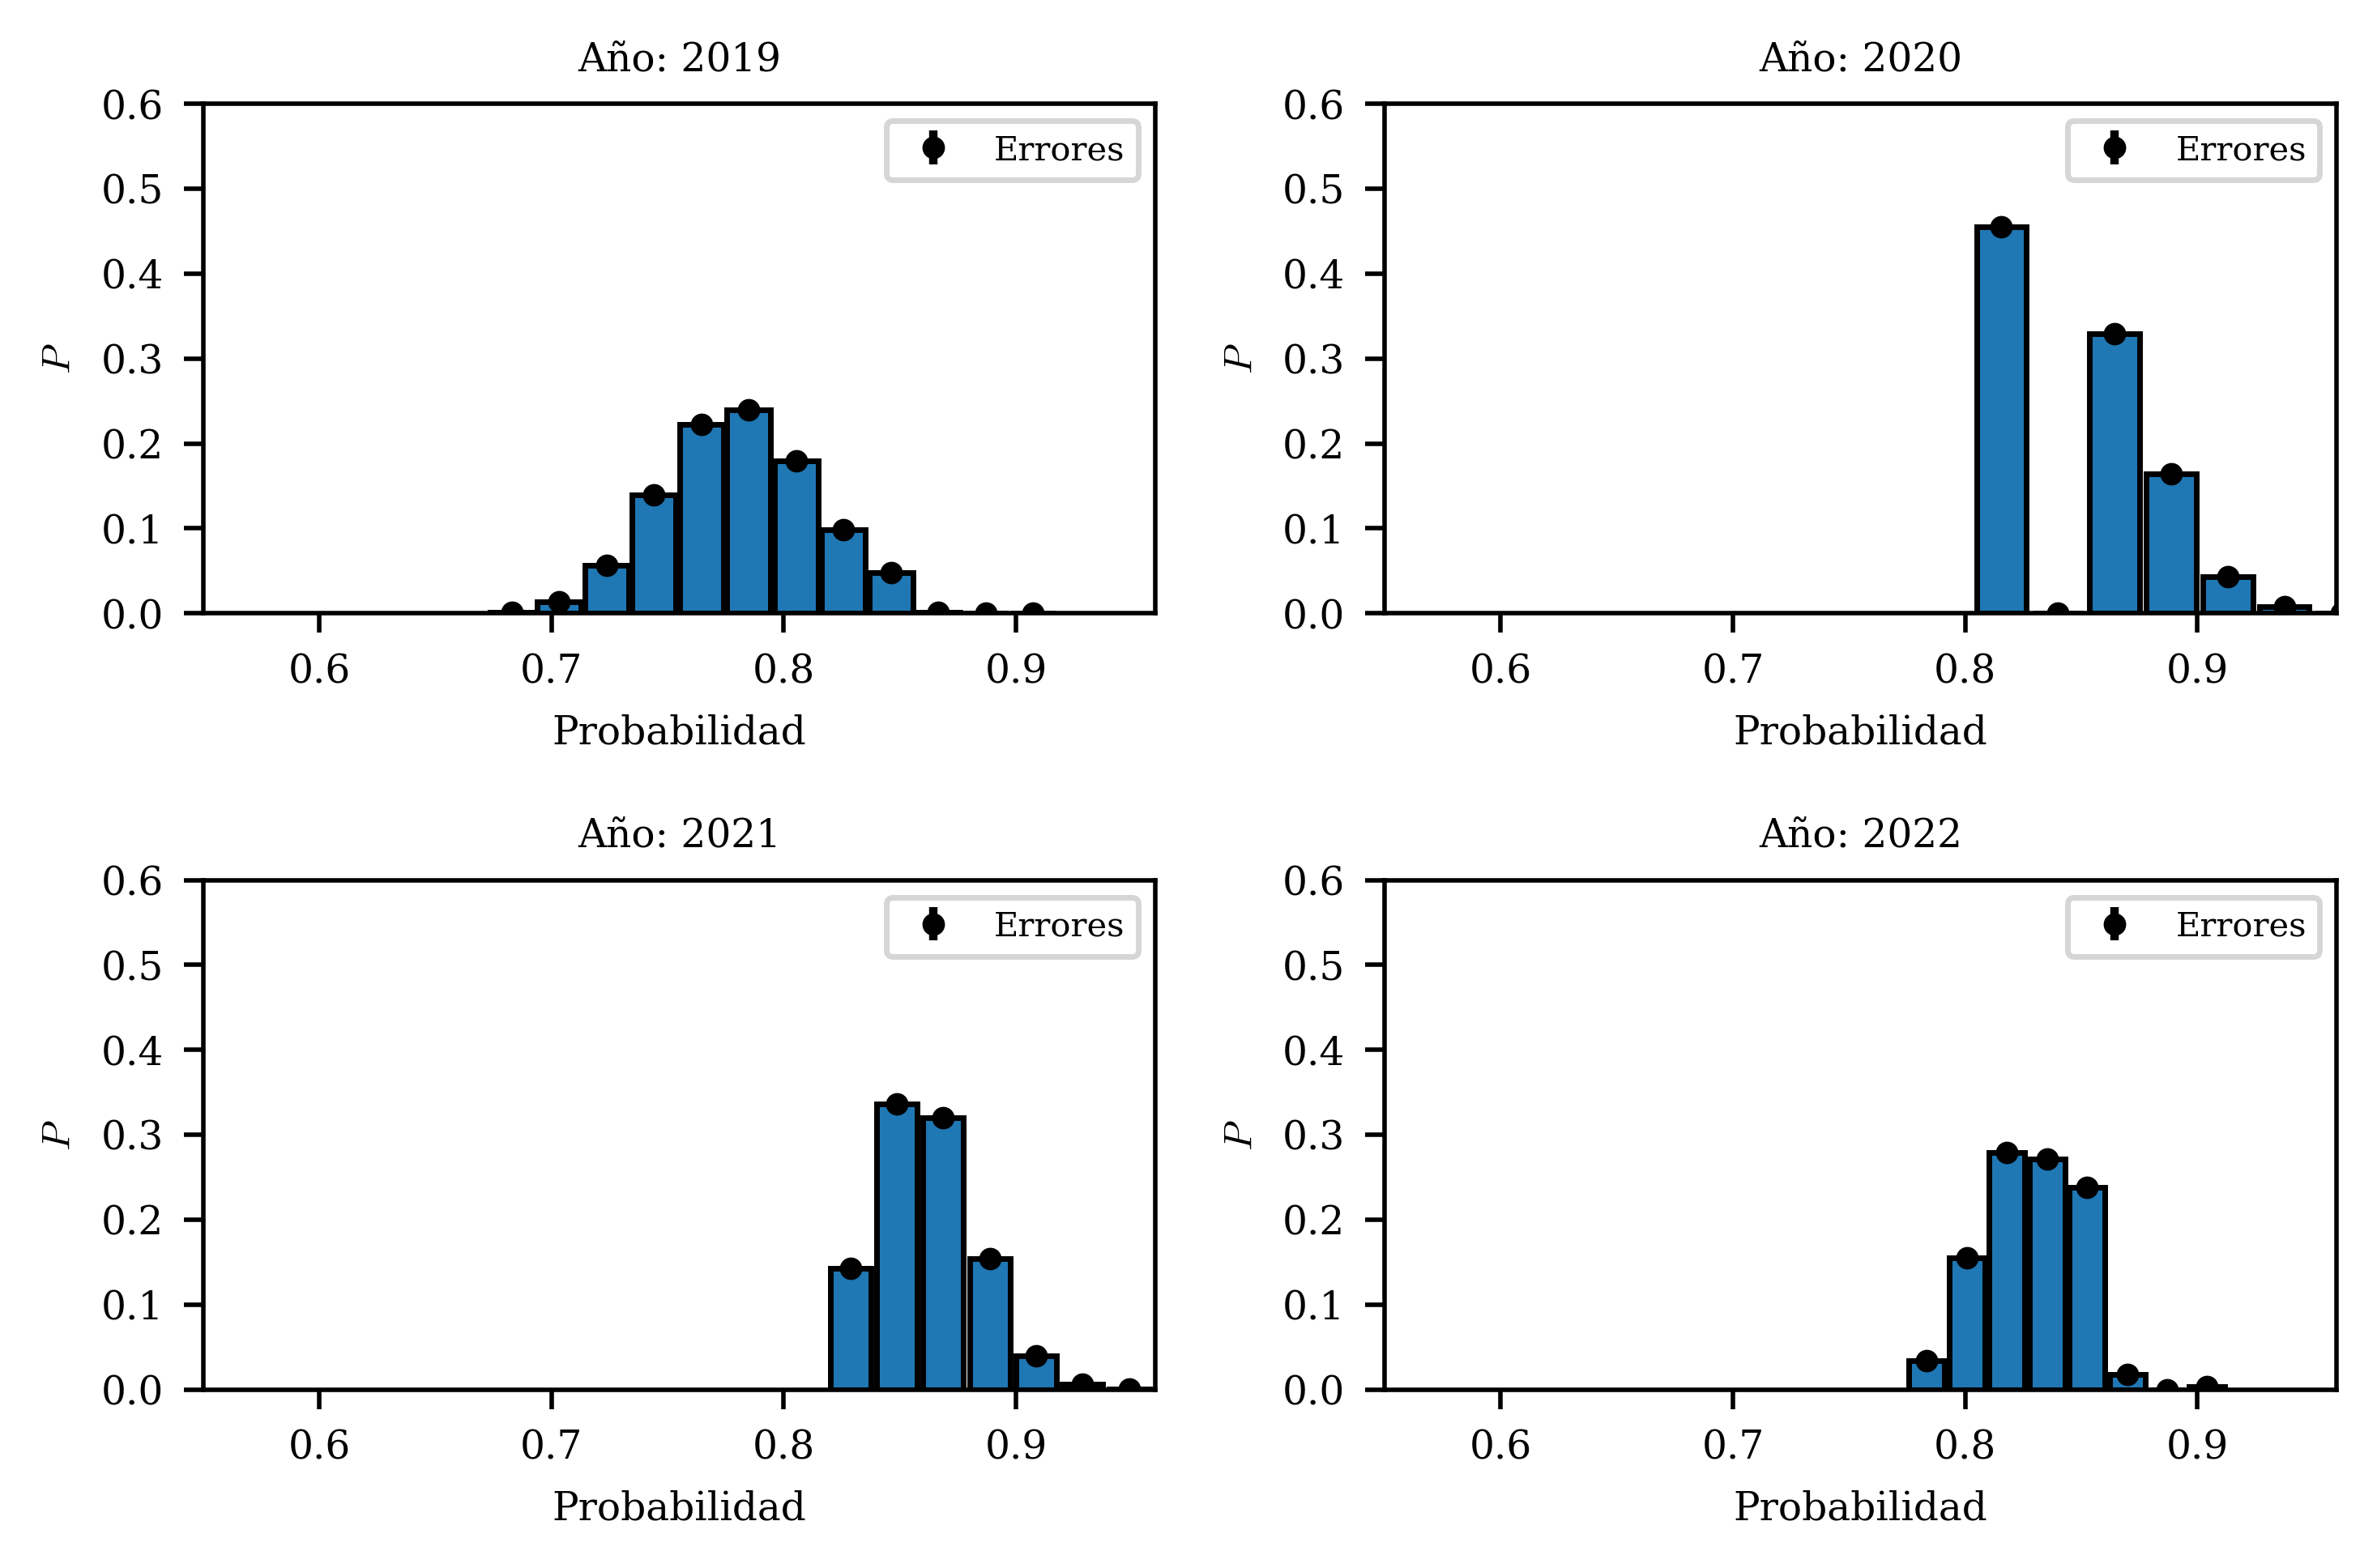

In [8]:
for i in range(len(resultados)):
    data = resultados[i]
    histogramas(data, i, y, x_label = 'Probabilidad')

## 2)
Sobre la base de las dos distribuciones anteriores establezca las probabilidades condicionales críticas $p_C(M|m)$ y $p_C(H|h)$ que determinan las regiones de rechazo con una significancia $\alpha = 0.05$.


In [37]:
#Para determinar esto la idea es integrar sobre k o sumar sobre para ver cuales son las probabilidades condicionales críticas
#que determinan las regiones de rechazo 
#OBS: tomamos una postura conservadora, vamos a querer que la sumatoria sea 0.05 o más

#En este caso las zonas de rechazo serán aquellas donde o haya probabilidades altas para corroborar una posible homofilia
#Es decir, establecemos la zona crítica a la derecha, donde la probabilidad de que dada una candidata salga una directora y dado un candidato salga un director

alpha = 0.05
p_0 = []
p_1 = []

a_0 = []
a_1 = []

for i in range(len(resultados)):
    data = resultados[i]
    for j in range(len(y)):
        bins=np.linspace(np.min(data[j][:]),np.max(data[j][:]), len(np.unique(data[j][:])))
        Y = np.histogram(data[j][:], bins=bins)[0] # Histograma sin normalizar
        y_norm = Y / (np.sum(Y) ) # Histograma normalizado

        #Selecciono los resultados para indicar zona de las colas

        if i == 0: 
            alpha_1 = 0
            for n in range(1, len(bins)-1):
                alpha_1 = alpha_1 + y_norm[-n]
                if alpha_1 >= alpha:
                    a_0.append(alpha_1)
                    p_0.append(bins[-n -1])
                    break


        elif i == 1: 
            #print(np.unique(data[j][:]))
            alpha_1 = 0
            for n in range(1, len(bins)-1):
                alpha_1 = alpha_1 + y_norm[-n]
                #print(f'bins: {bins[-n]}')
                #print(f'integral: {alpha_1}')
                if alpha_1 > alpha:
                    #print('en el if')
                    #print(bins[-n + 1])
                    #print(f'{titulos[i]} en el {y[j]}')
                    a_1.append(alpha_1)
                    p_1.append(bins[-n -1])
                    break        

p = [p_0, p_1]
a = [a_0, a_1]
#print(p)


Dist P(m|M)




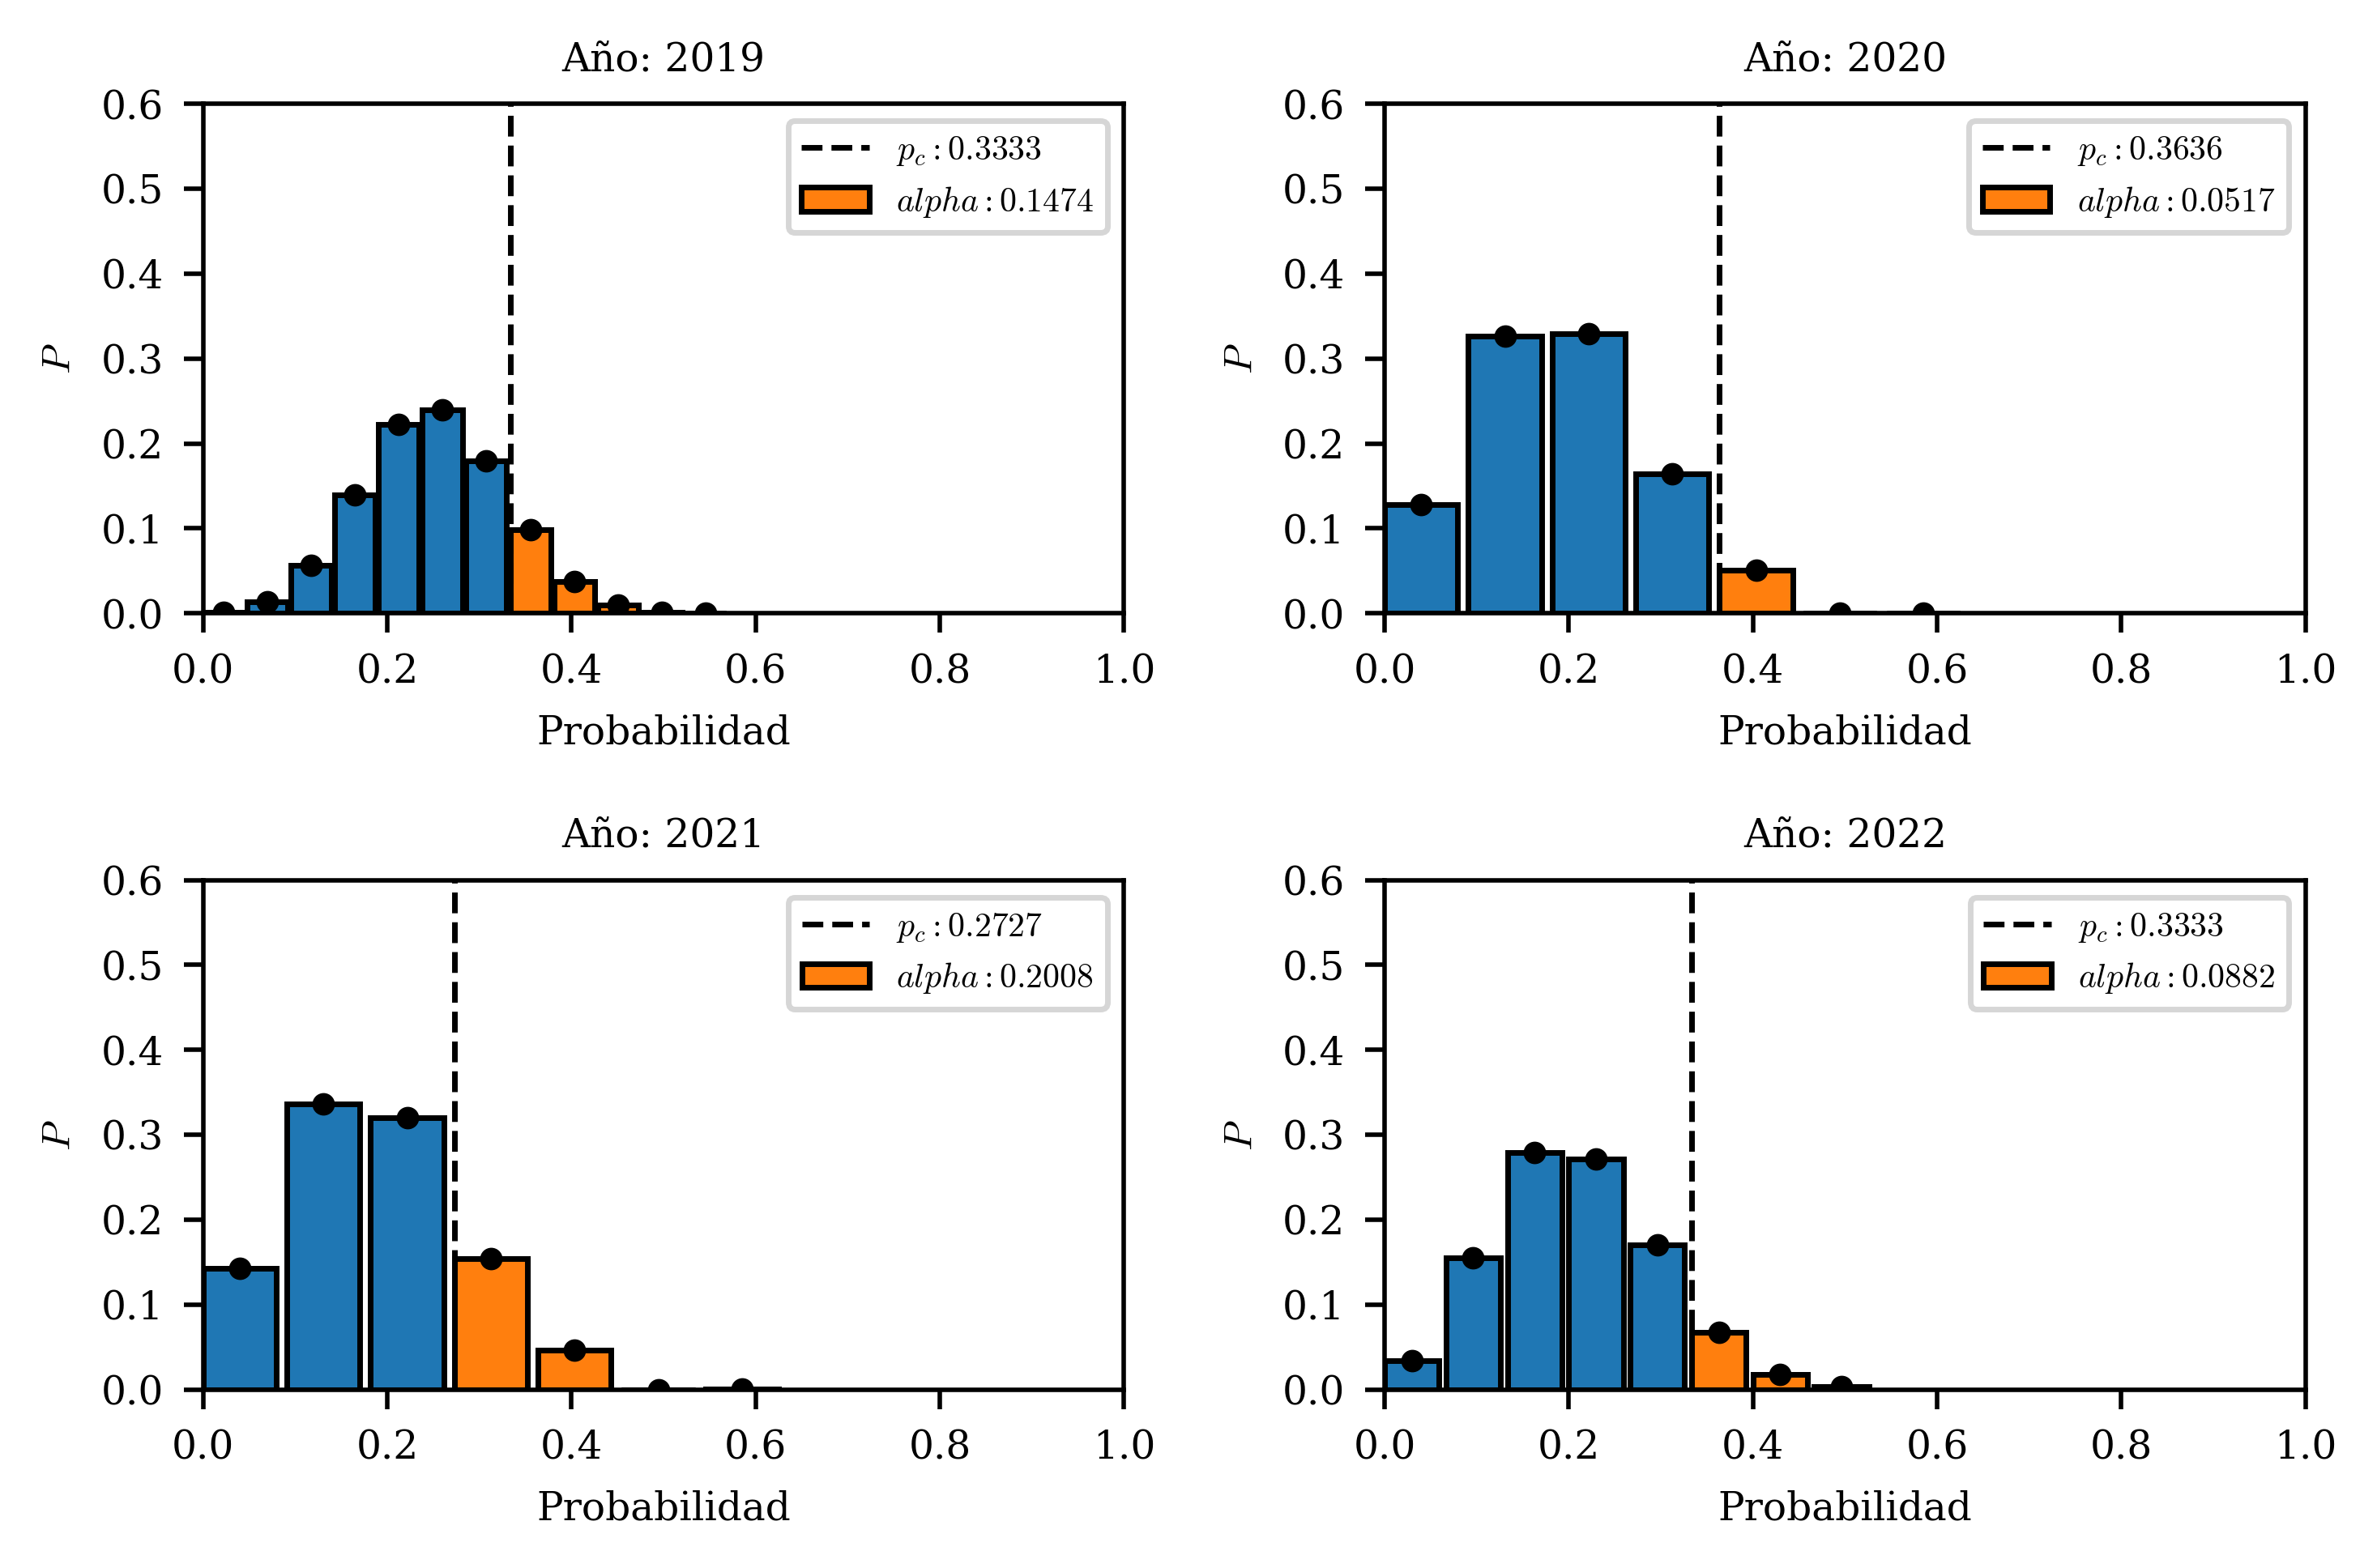


Dist P(h|H)




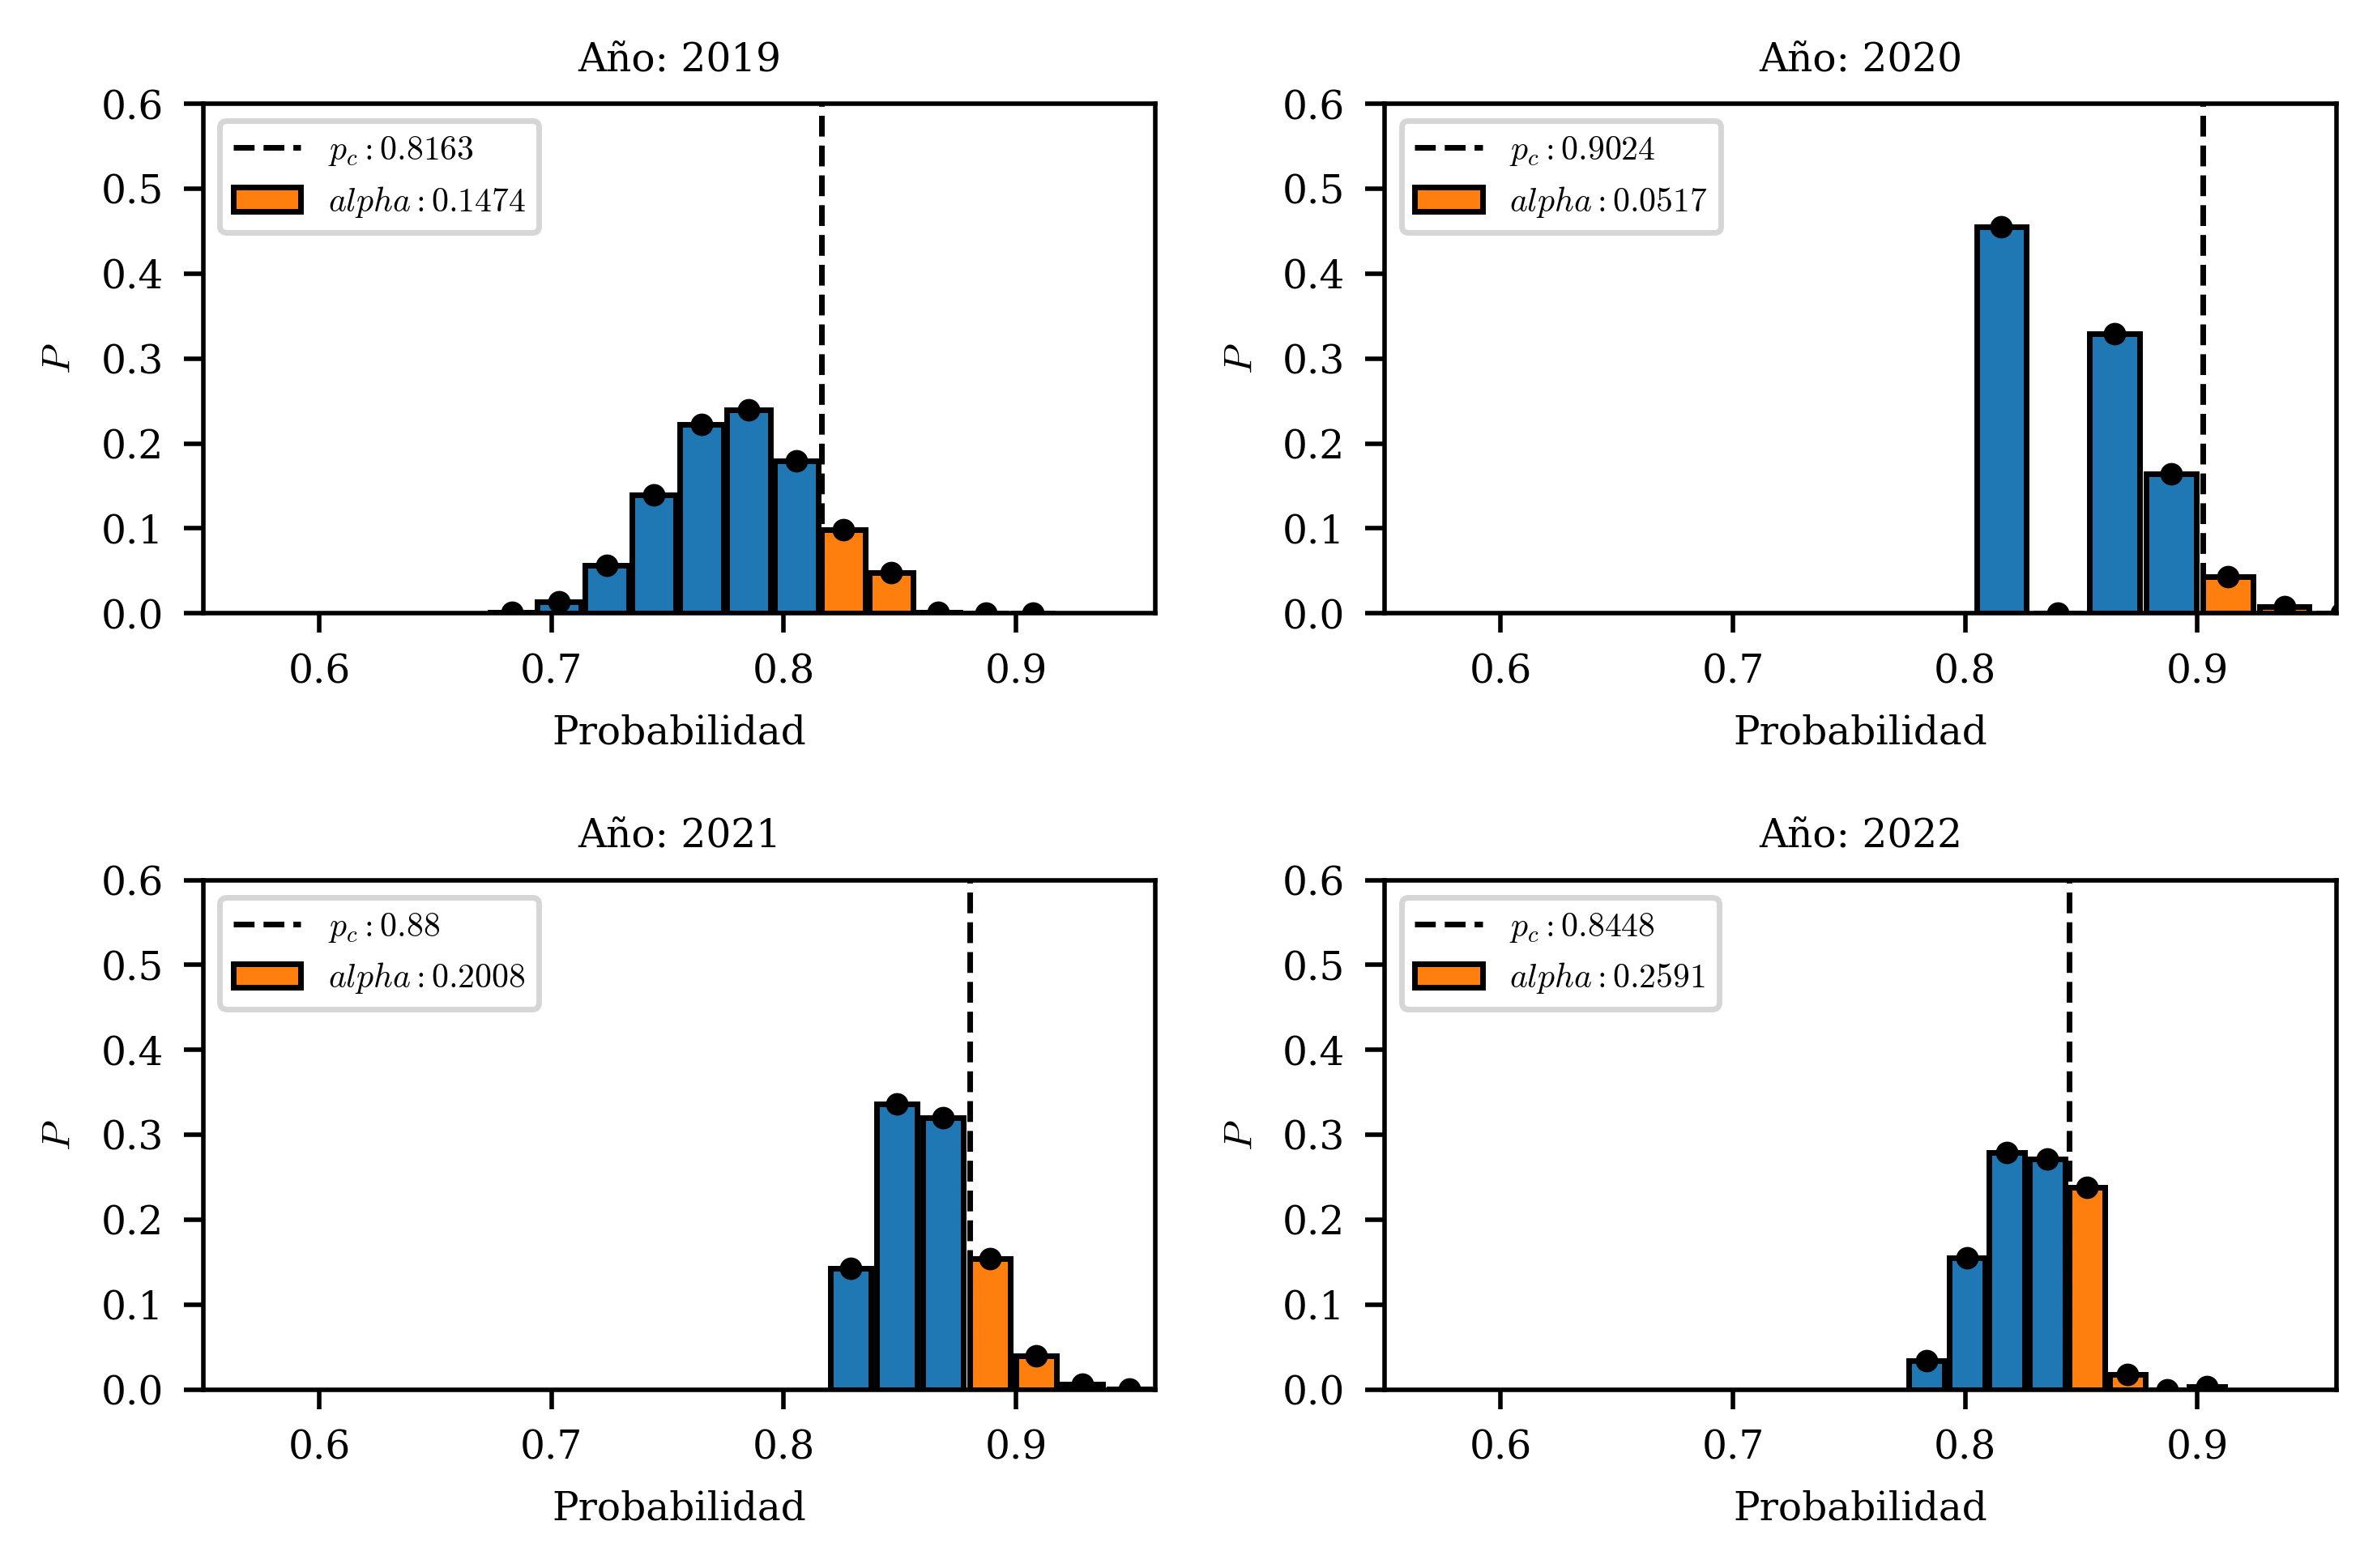

In [41]:
for i in [0,1]:
    data = resultados[i]
    p_j = p[i]
    alpha = a[i]
    histogramas(data, i, y, p_c = True, p_c_data = p_j, alpha_data= alpha, x_label = 'Probabilidad')

## 3) 
Ahora, utilizando las probabilidades condicionales reportadas en la Tabla $1$ y las distribuciones obtenidas diga, año a año, y por género, en qué casos rechaza la hipótesis nula de que no hay afinidad de género.


Dist P(m|M)


0.3809, bins: (n) 0.38095238095238093
0.2727, bins: (n) 0.2727272727272727
0.2667, bins: (n) 0.26666666666666666


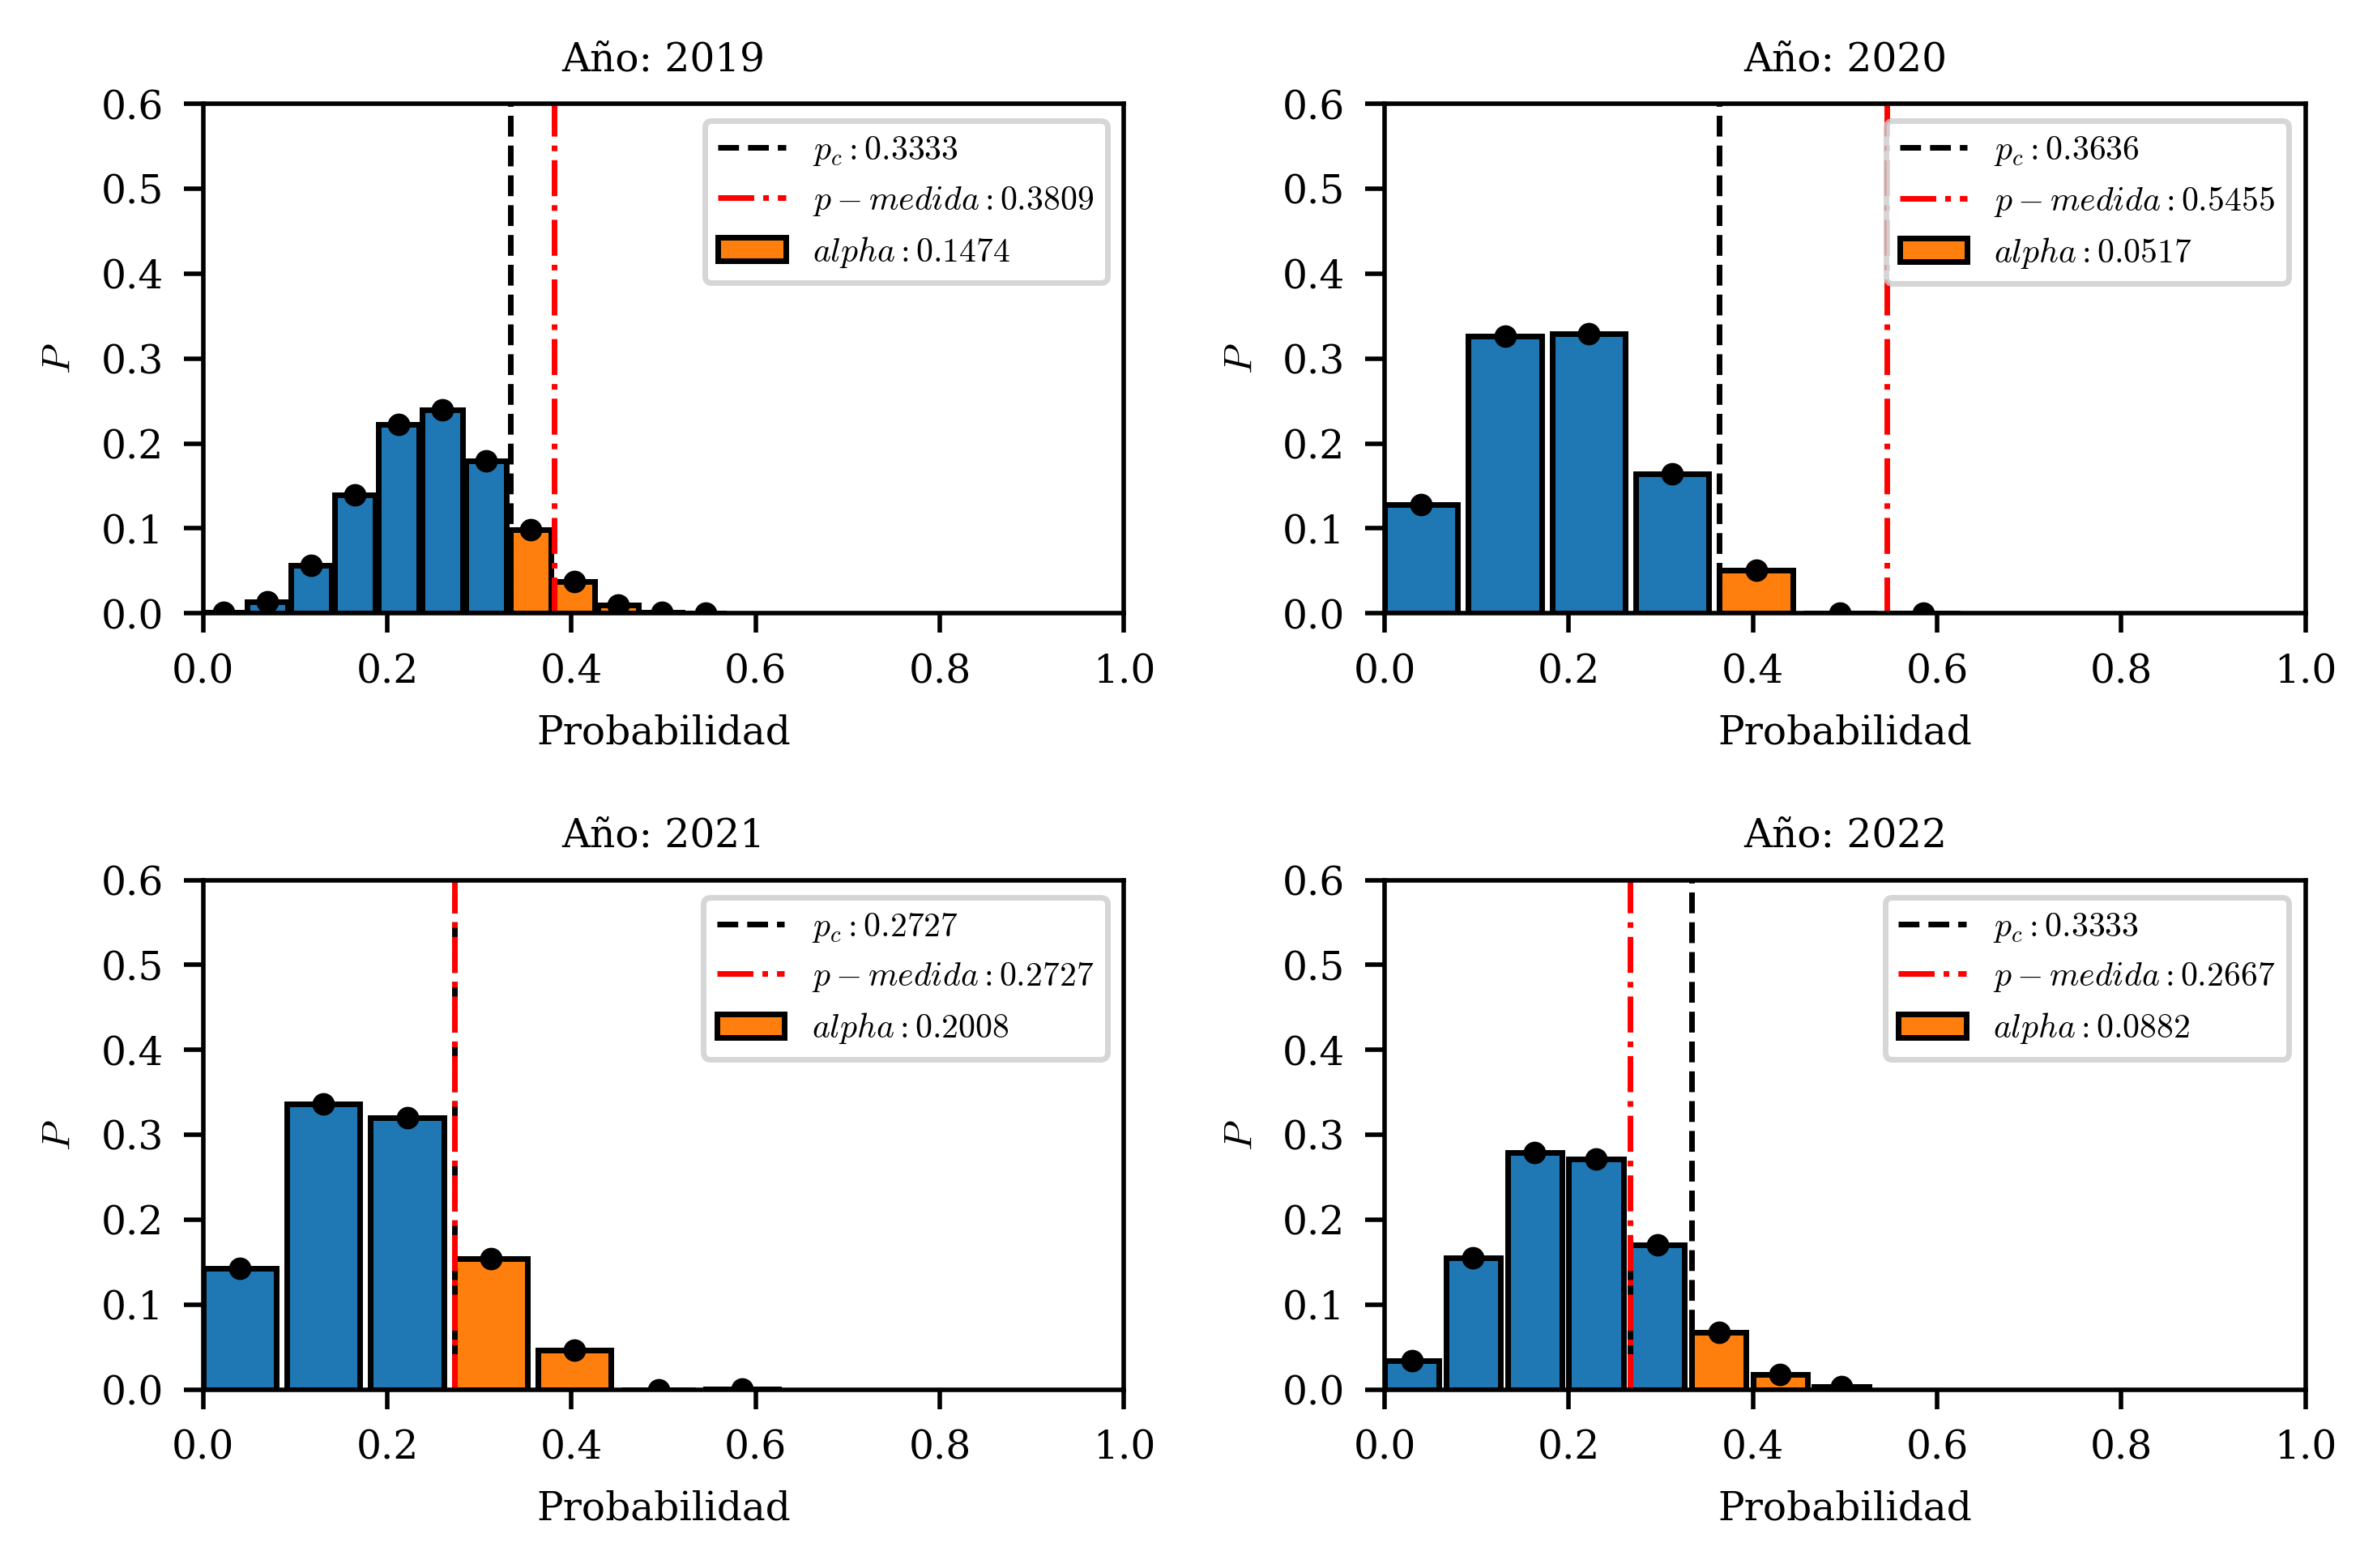


p-values: [0.049159999999999995, 0.0001, 0.20082, 0.25908]



Dist P(h|H)


0.8367, bins: (n) 0.8367346938775511
0.9512, bins: (n) 0.9512195121951219
0.88, bins: (n) 0.8799999999999999
0.8448, bins: (n) 0.8448275862068966


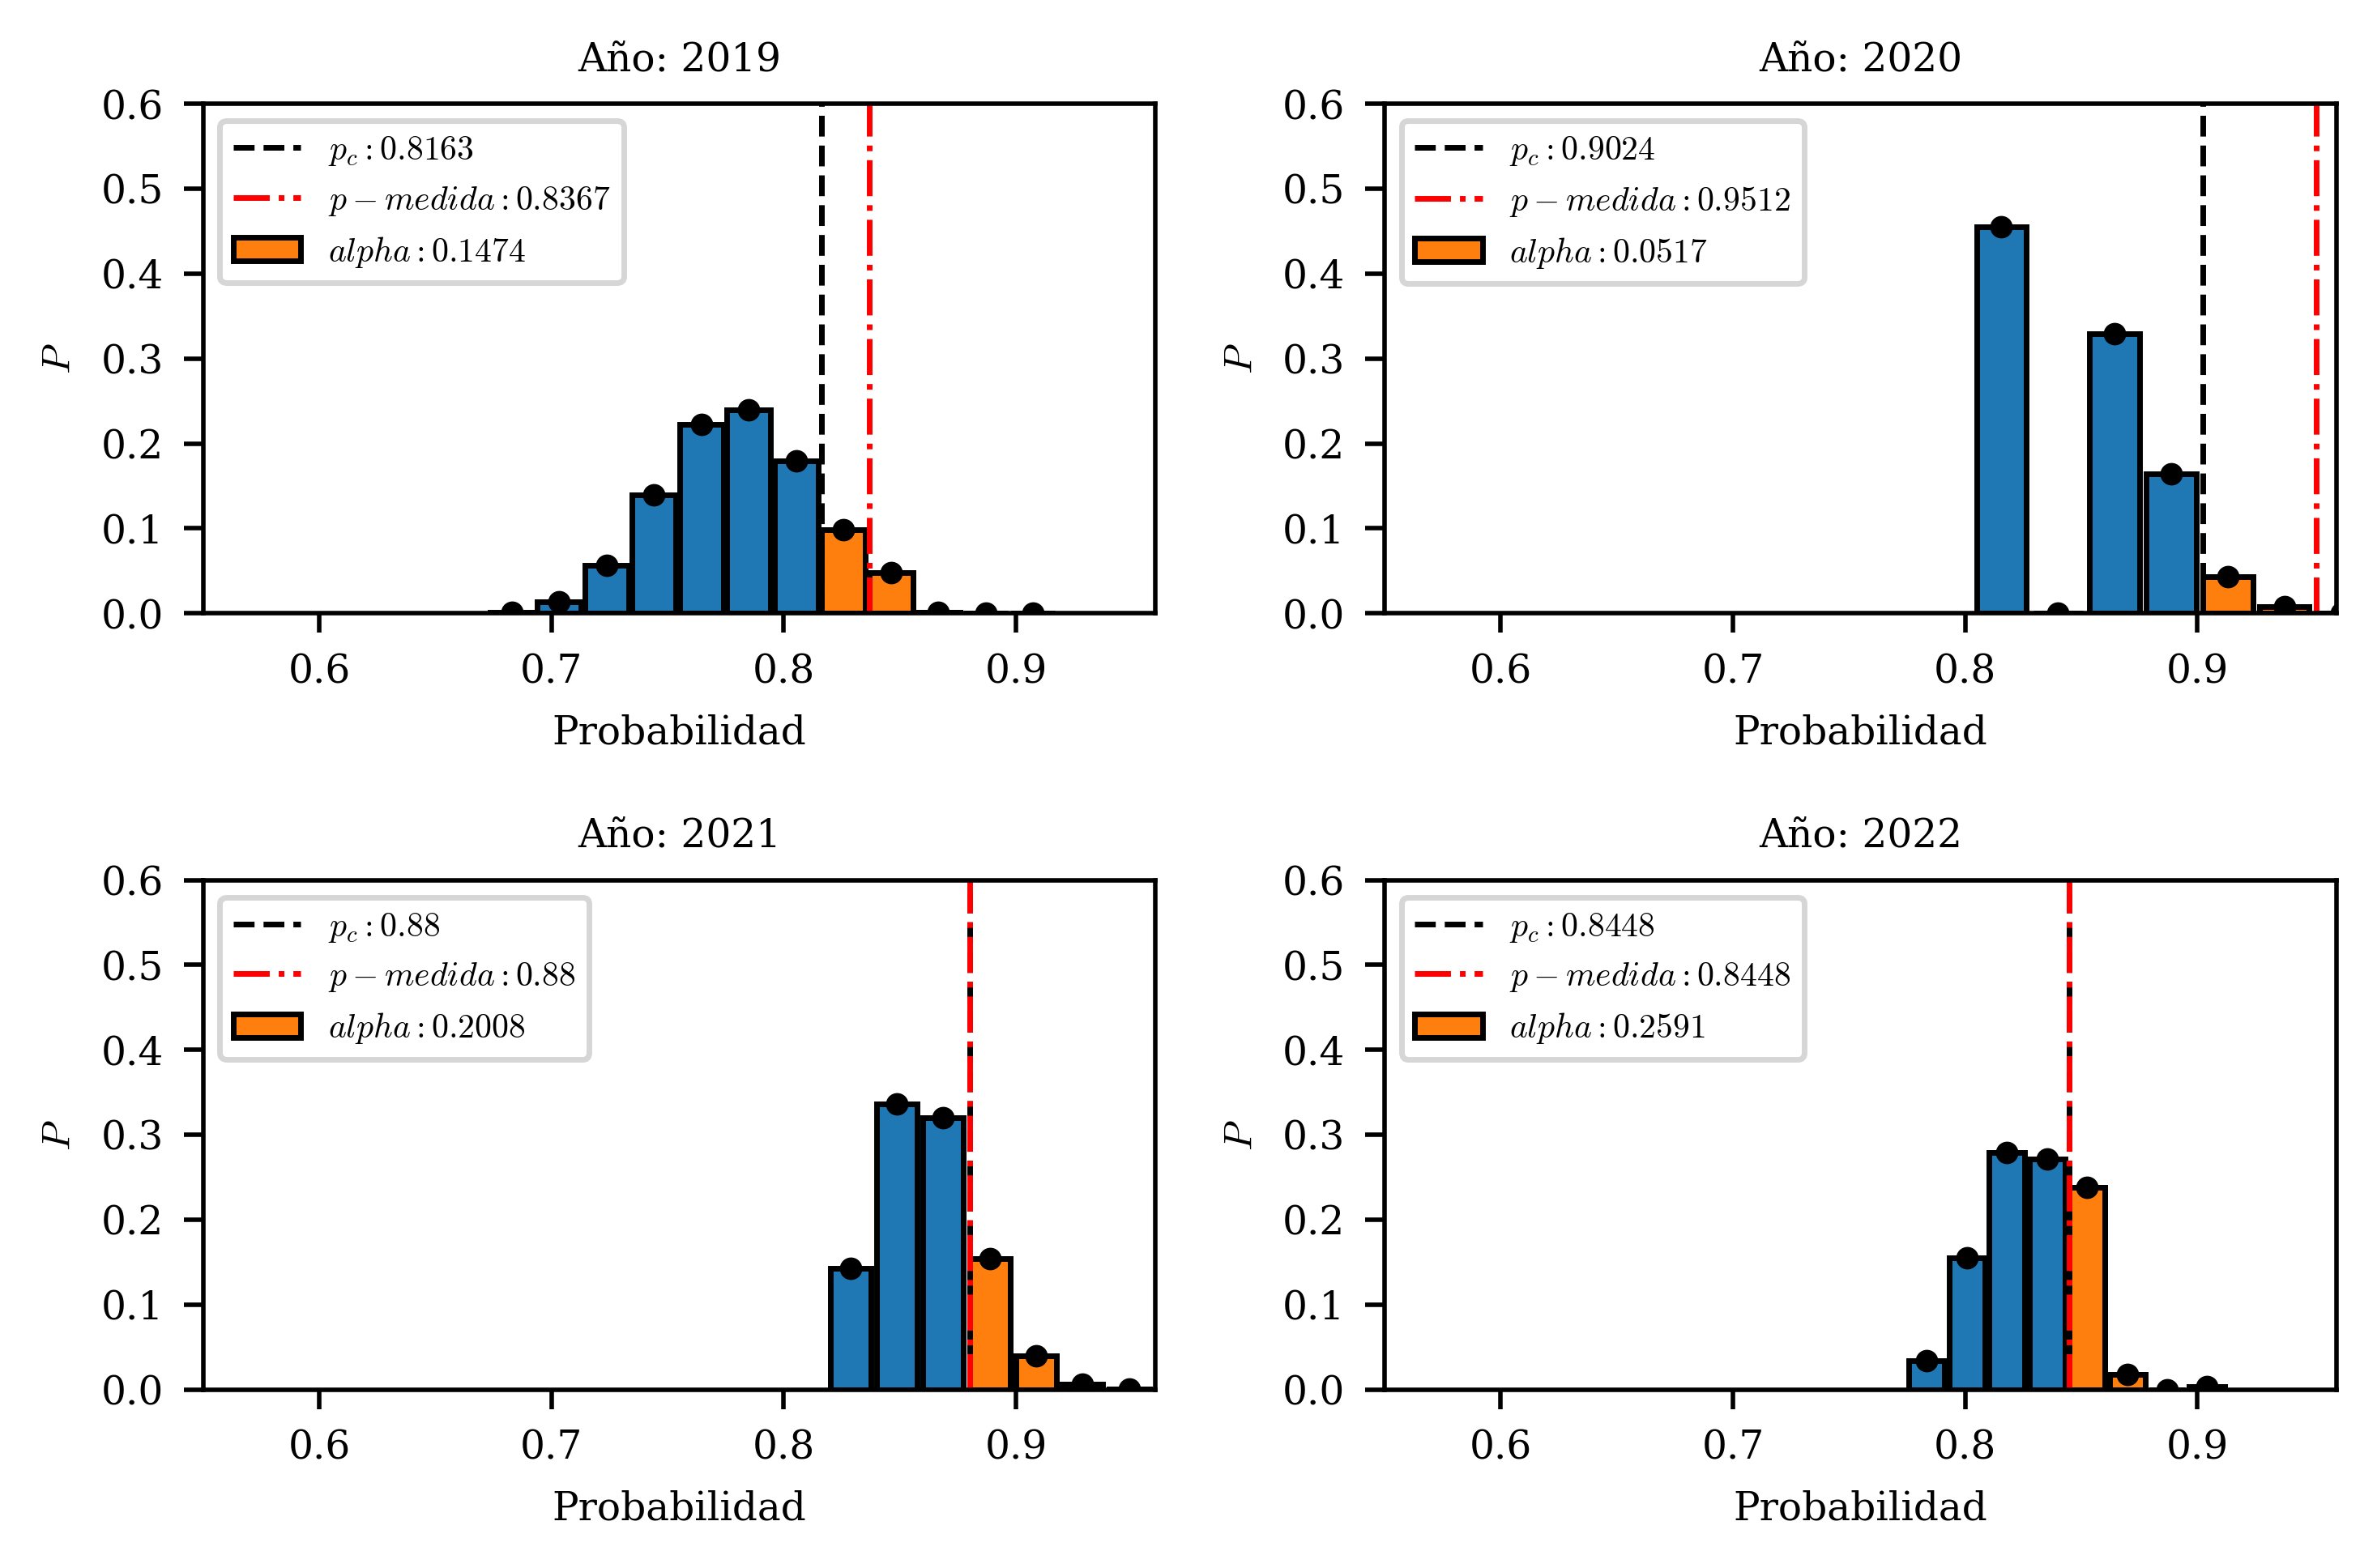


p-values: [0.049159999999999995, 0.0001, 0.20082, 0.25908]




In [42]:
pvals = []

for i in [0, 1]:
    data = resultados[i]
    a_j = a[i]
    p_j = p[i]
    
    if i == 0:
        p_v_j = p_cond_mM
    elif i == 1:
        p_v_j = p_cond_hH

    pvalue =  histogramas(data, i, y, p_c = True, p_c_data = p_j, alpha_data= a_j, p_m = True, p_m_data = p_v_j, x_label = 'Probabilidad')
    pvals.append(pvalue)
    

## 4)
Ahora calcule el $p-valor$ correspondiente a cada probabilidad condicional observada utilizando las distribuciones simuladas y luego combine todos los $p-valores$ a partir del estadístico $\chi_{2n} = -2 ln(\prod_{n}^{i}p_i)$. Calcule el $p-valor$ conjunto y diga si acepta o rechaza la hipótesis nula con una significancia $\alpha=0.05$.


Se obtuvo como p-valor global (osea al combinar todos os p-values de las dist P(m|M)): 30.35796009091751

De allí la cola a derecha del p-valor global se obtiene como 0.0001826866118321835

Finalmente la x crítica para la cual alpha = 0.05 es 15.507



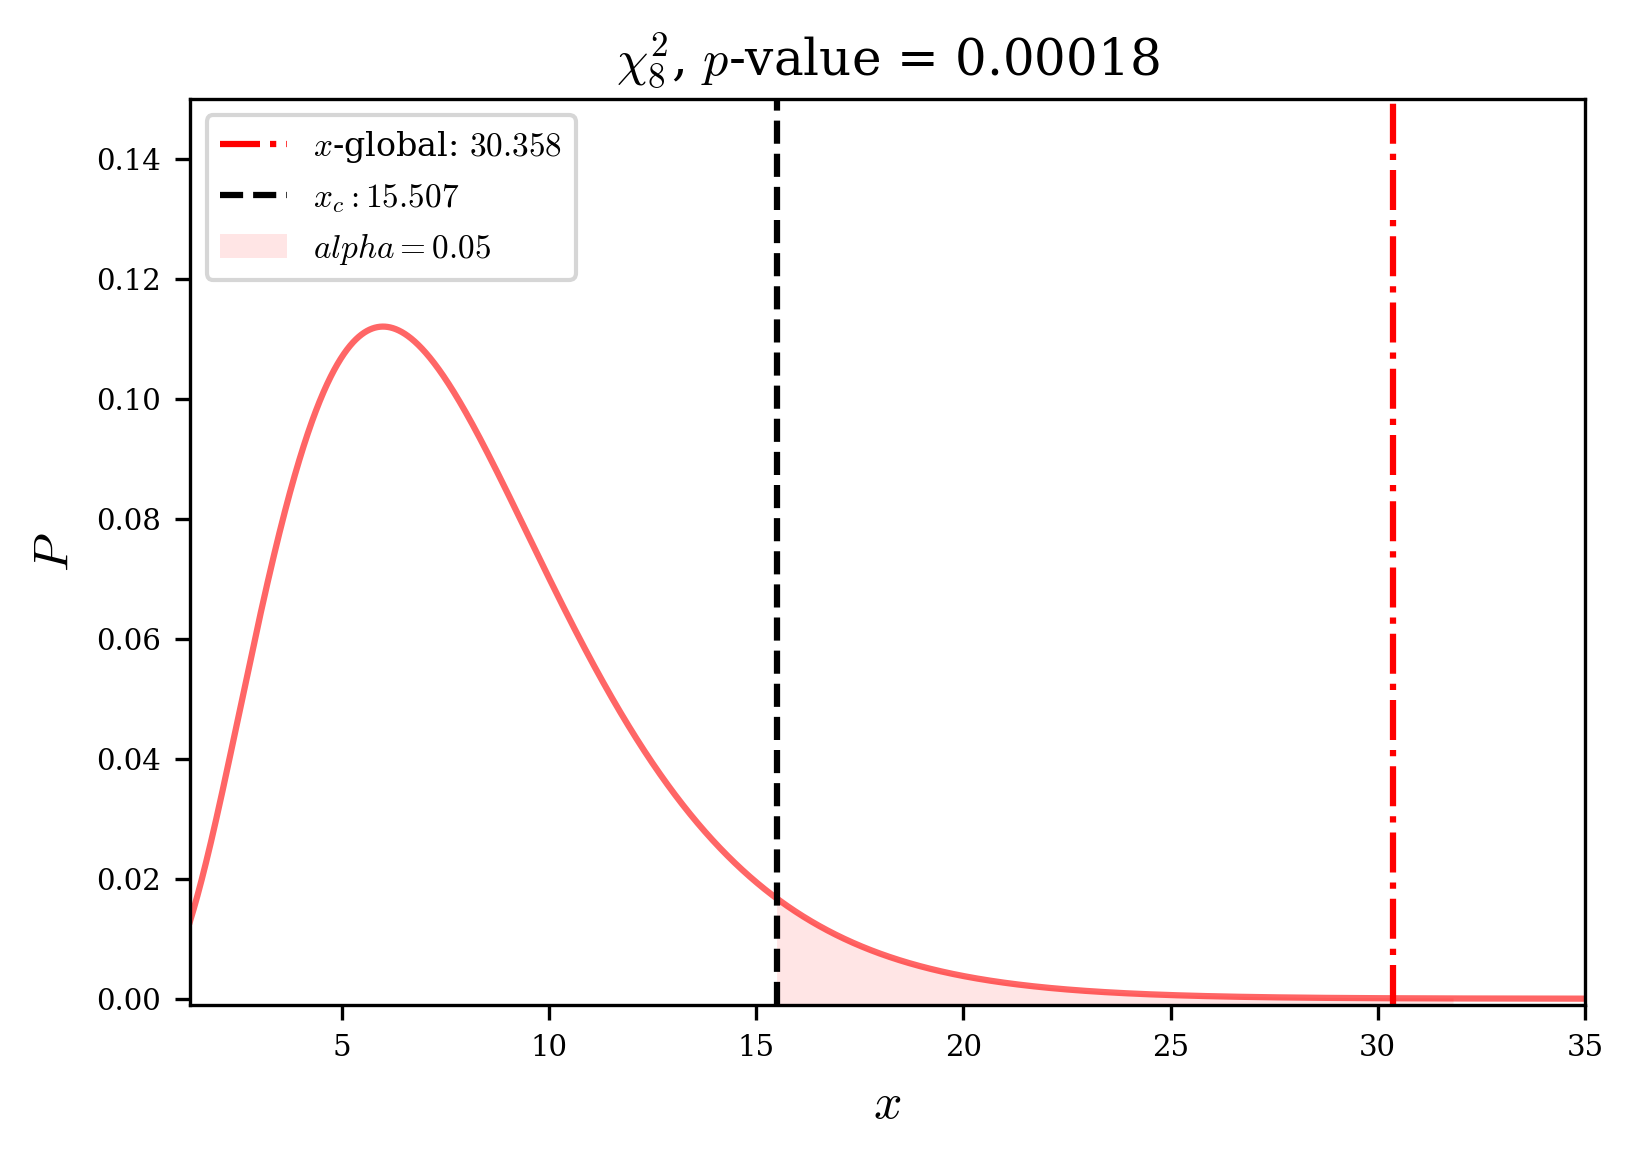

Se obtuvo como p-valor global (osea al combinar todos os p-values de las dist P(h|H)): 30.35796009091751

De allí la cola a derecha del p-valor global se obtiene como 0.0001826866118321835

Finalmente la x crítica para la cual alpha = 0.05 es 15.507



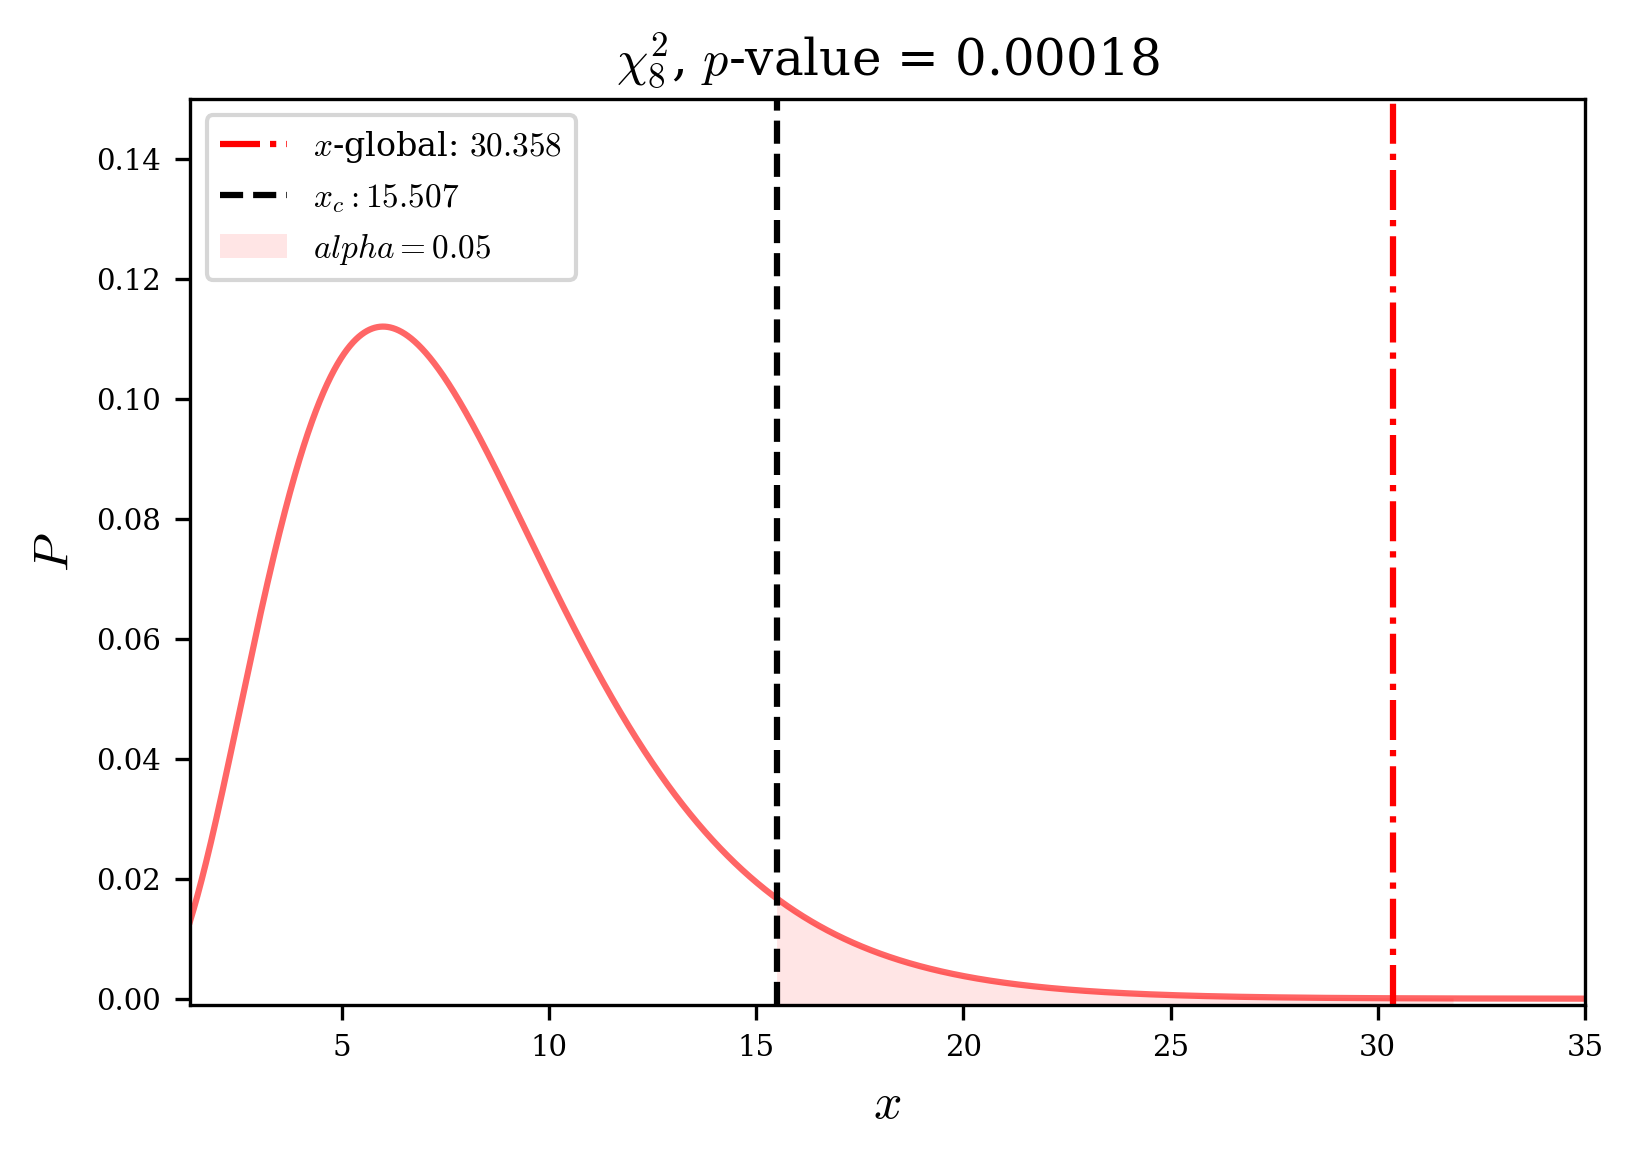

In [19]:
for i in [0,1]:
#Combino p-valores obtenidos
#A partir de ese resultado uso que esa dist es conocida y calculo el p-valor global

    p_val_global = -2*np.log(np.prod(pvals[i]))
    print(f'Se obtuvo como p-valor global (osea al combinar todos os p-values de las dist {titulos[i]}): {p_val_global}\n')

    n = len(pvals[i])*2 #grados de libertad

    #Calculo el p-valor:
    p_val_chi = 1 - chi2.cdf(p_val_global, n)
    print(f'De allí la cola a derecha del p-valor global se obtiene como {p_val_chi}\n')

    #calculo el p-crit para alpha = 0.05
    p_crit = chi2.ppf(1 - 0.05, n)   
    print(f'Finalmente la x crítica para la cual alpha = 0.05 es {np.round(p_crit,3)}\n')

    x = np.linspace(chi2.ppf(0.005, n),chi2.ppf(0.9999999999, n), 10000)

    fig, ax = plt.subplots(1, 1, dpi=150)
    plt.plot(x, chi2.pdf(x, n),'r-', lw=1.5, alpha=0.6)
    ax.axvline(p_val_global, ls= '-.', color = 'red', label = f'$x$-global: ${np.round(p_val_global, 3)}$')
    ax.axvline(p_crit, ls= '--', color = 'black', label = f'$x_c: {np.round(p_crit, 3)}$')
    ax.fill_between(np.linspace(p_crit, chi2.ppf(0.9999, n), 1000), chi2.pdf(np.linspace(p_crit, chi2.ppf(0.9999, n), 1000), n), [-0.001]*1000 ,facecolor='red', alpha=0.1, label=f'$alpha = 0.05$')
    ax.set_xmargin(0)
    ax.set_xlim(x[0], 35)
    ax.set_ylim(-0.001, 0.15)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$P$")
    ax.set_title(f"$\chi_8^2$, $p$-value = {np.round(p_val_chi, 5)}")
    ax.legend()
    plt.show()

# 2do TEST
## Test de Fisher

## 5)
Ahora aplique el test de Fisher. Para ello construya la tabla de contingecia y calcule la probabilidad de todas las tablas posibles sujetas a las condiciones de contorno impuestas por los datos de la Tabla 1. Calcule el $p-valor$ correspondiente para la tabla de contingencia que devuelve las probabilidades condicionales reportadas en la Tabla $1$. Compare con el resultado obtenido utilizando el test anterior.

In [15]:
#condiciones de contorno n_h, n_m, n_H, n_M

tablas_y = []
probs_y = []
for j in np.arange(len(y)):
    n_m = m[j]
    n_h = h[j]
    n_M = M[j]
    n_H = H[j]
    n_it = np.arange(0, n_M + 1)
    probs = []
    tablas = []
    for i in n_it:
        p = hipergeo(n_m, n_m + n_h, n_M - i, n_M)
        tabla = [n_M - i, n_m - n_M + i,i, n_h - i]
        probs.append(p)
        tablas.append(tabla)
    probs_y.append(probs)
    tablas_y.append(tablas)

for i in np.arange(len(y)):
    print(f'año: {y[i]}: \n{tablas_y[i]}\n')

pvaly = []
for j in np.arange(len(y)):
    n_it = np.arange(0, M[j] + 1)
    #print(f'año {y[j]}')
    for i in n_it:
        pcond_hH = (tablas_y[j][i][3])/(h[j])
        pcond_mM = (tablas_y[j][i][0])/(m[j])
        #print(f'{i}:phH: {pcond_hH}, pmM: {pcond_mM}\n')
        if np.round(pcond_hH, 2) == np.round(p_cond_hH[j], 2):
            #print(f'sumo hasta la tabla {i}, {p_cond_hH[j]}\n')
            pval_y =  np.sum(probs_y[j][:i])
            pvaly.append(pval_y)

print(f'P-Valores por año: {pvaly}')


año: 2019: 
[[16, 5, 0, 49], [15, 6, 1, 48], [14, 7, 2, 47], [13, 8, 3, 46], [12, 9, 4, 45], [11, 10, 5, 44], [10, 11, 6, 43], [9, 12, 7, 42], [8, 13, 8, 41], [7, 14, 9, 40], [6, 15, 10, 39], [5, 16, 11, 38], [4, 17, 12, 37], [3, 18, 13, 36], [2, 19, 14, 35], [1, 20, 15, 34], [0, 21, 16, 33]]

año: 2020: 
[[8, 3, 0, 41], [7, 4, 1, 40], [6, 5, 2, 39], [5, 6, 3, 38], [4, 7, 4, 37], [3, 8, 5, 36], [2, 9, 6, 35], [1, 10, 7, 34], [0, 11, 8, 33]]

año: 2021: 
[[9, 2, 0, 50], [8, 3, 1, 49], [7, 4, 2, 48], [6, 5, 3, 47], [5, 6, 4, 46], [4, 7, 5, 45], [3, 8, 6, 44], [2, 9, 7, 43], [1, 10, 8, 42], [0, 11, 9, 41]]

año: 2022: 
[[13, 2, 0, 58], [12, 3, 1, 57], [11, 4, 2, 56], [10, 5, 3, 55], [9, 6, 4, 54], [8, 7, 5, 53], [7, 8, 6, 52], [6, 9, 7, 51], [5, 10, 8, 50], [4, 11, 9, 49], [3, 12, 10, 48], [2, 13, 11, 47], [1, 14, 12, 46], [0, 15, 13, 45]]

P-Valores por año: [0.012467220756192193, 1.8198412930959046e-05, 0.04699966959905788, 0.08755203088346357]


Se obtuvo como p-valor global (osea al combinar todos os p-values): 41.583930637190065

De allí la prob crítica se obtiene como 1.6207665217704559e-06

Finalmente la x crítica para la cual alpha = 0.05 es 15.507



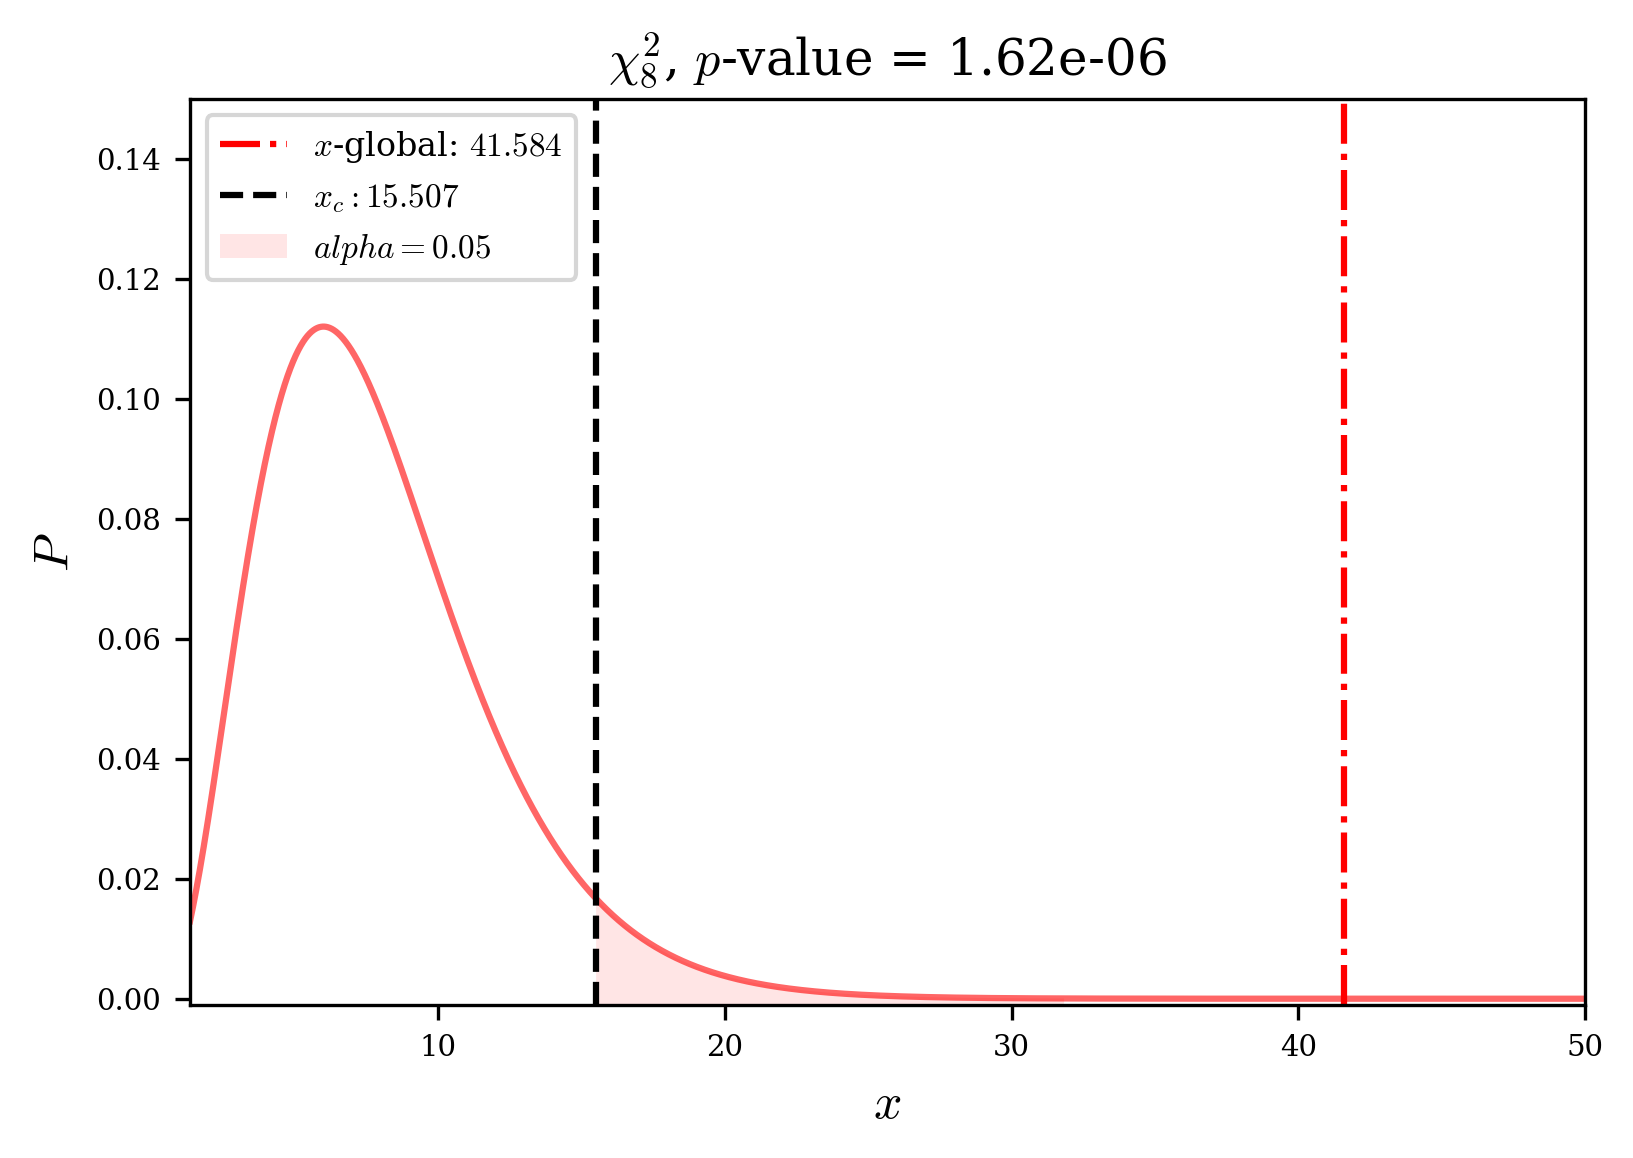

In [24]:
p_val_global = -2*np.log(np.prod(pvaly))
print(f'Se obtuvo como p-valor global (osea al combinar todos os p-values): {p_val_global}\n')

n = len(pvaly)*2 #grados de libertad

#Calculo el p-valor:
p_val_chi = 1 - chi2.cdf(p_val_global, n)
print(f'De allí la prob crítica se obtiene como {p_val_chi}\n')

#calculo el p-crit para alpha = 0.05
p_crit = chi2.ppf(1 - 0.05, n)   
print(f'Finalmente la x crítica para la cual alpha = 0.05 es {np.round(p_crit,3)}\n')

x = np.linspace(chi2.ppf(0.005, n),chi2.ppf(0.9999999999, n), 10000)

fig, ax = plt.subplots(1, 1, dpi=150)
plt.plot(x, chi2.pdf(x, n),'r-', lw=1.5, alpha=0.6)
ax.axvline(p_val_global, ls= '-.', color = 'red', label = f'$x$-global: ${np.round(p_val_global, 3)}$')
ax.axvline(p_crit, ls= '--', color = 'black', label = f'$x_c: {np.round(p_crit, 3)}$')
ax.fill_between(np.linspace(p_crit, chi2.ppf(0.9999, n), 1000), chi2.pdf(np.linspace(p_crit, chi2.ppf(0.9999, n), 1000), n), [-0.001]*1000 ,facecolor='red', alpha=0.1, label=f'$alpha = 0.05$')
ax.set_xmargin(0)
ax.set_xlim(x[0], 50)
ax.set_ylim(-0.001, 0.15)
ax.set_xlabel("$x$")
ax.set_ylabel("$P$")
ax.set_title(f"$\chi_8^2$, $p$-value = {np.round(p_val_chi, 8)}")
ax.legend()
plt.show()